# K-Neighbours

In [2]:
# Importar el dataset iris
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Dividir los datos en train y test (70-30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [4]:
# Crear un pipeline con un StandardScaler y el modelo KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

In [7]:
# Crear una rejilla de hiperparámetros con los siguientes valores posible:
# n_neighbors: 3, 5, 1, 9, 11
# weights: uniform, distance
# metric: euclidean, manhattan, minkowski
param_grid = {
    "clf__n_neighbors": [1, 3, 5, 9, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__metric": ["euclidean", "manhattan", "minkowski"]
}

In [11]:
# Crear y entrenar un GridSearchCV con 5 cross-validations
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'clf__n_neighbors': [1, 3, 5, 9, 11],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [12]:
# Mostrar por pantalla los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

Mejores hiperparámetros encontrados: {'clf__metric': 'euclidean', 'clf__n_neighbors': 9, 'clf__weights': 'distance'}


In [13]:
# Guardar en una variable el mejor modelo y obtener sus clases predichas
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [15]:
# Obtener su accuracy y su classification report
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [16]:
neighbor_range = range(1, 16)

train_precisions = []
test_precisions = []

for n_neighbors in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', knn)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_precisions.append(accuracy_score(y_train, y_train_pred))
    test_precisions.append(accuracy_score(y_test, y_test_pred))

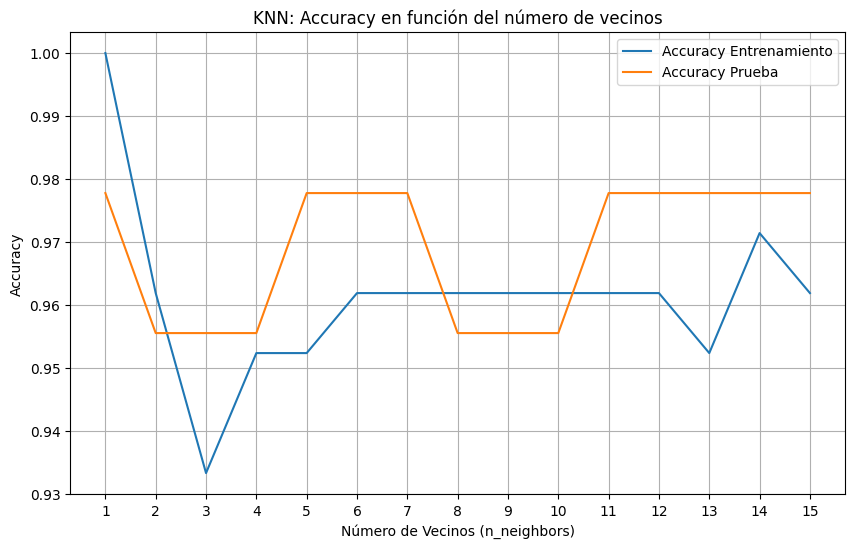

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, train_precisions, label='Accuracy Entrenamiento', linestyle="-")
plt.plot(neighbor_range, test_precisions, label='Accuracy Prueba', linestyle="-")
plt.title('KNN: Accuracy en función del número de vecinos')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbor_range)
plt.legend()
plt.grid(True)
plt.show()